In [2]:
#1. 6-11월 전체 데이터에서 4개 항공사 데이터만 추출
import json

# JSON 파일 이름
input_file_name = '6-11월.json'
output_file_name = '6-11월 4개 항공사.json'

# 추출할 회사 목록
target_companies = ["대한항공", "제주항공", "아시아나항공", "진에어"]

def filter_by_company(data):
    """
    JSON 데이터에서 company 값이 특정 회사 목록에 해당하는 항목만 추출.
    """
    if isinstance(data, dict):
        # "company" 키의 값을 확인
        if "company" in data and data["company"].strip().lower() in [c.lower() for c in target_companies]:
            return data  # 조건에 맞으면 반환
        # 중첩된 데이터 재귀 탐색
        return {key: filter_by_company(value) for key, value in data.items() if filter_by_company(value)}
    elif isinstance(data, list):
        # 리스트 항목 재귀 탐색
        return [filter_by_company(item) for item in data if filter_by_company(item)]
    return None  # 조건에 맞지 않는 경우 제거

try:
    # JSON 파일 읽기
    with open(input_file_name, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # 데이터 필터링
    filtered_data = filter_by_company(data)

    # 필터링된 JSON 데이터 저장
    with open(output_file_name, 'w', encoding='utf-8') as file:
        json.dump(filtered_data, file, ensure_ascii=False, indent=4)

    print(f"필터링된 JSON 데이터가 '{output_file_name}' 파일에 저장되었습니다.")
except FileNotFoundError:
    print(f"파일 '{input_file_name}'을(를) 찾을 수 없습니다.")
except json.JSONDecodeError:
    print("JSON 파일 형식이 올바르지 않습니다.")

필터링된 JSON 데이터가 '6-11월 4개 항공사.json' 파일에 저장되었습니다.


In [3]:
#2. 그 리스트 개수
import json

# JSON 파일 이름
file_name = '6-11월 4개 항공사.json'

def count_list_items(data):
    """
    JSON 데이터에서 최상위 리스트의 항목 수를 반환.
    """
    if isinstance(data, list):
        return len(data)  # 리스트라면 길이 반환
    return 0  # 리스트가 아닌 경우 0 반환

try:
    # JSON 파일 읽기
    with open(file_name, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # 최상위 리스트 항목 수 계산
    item_count = count_list_items(data)

    print(f"JSON 파일 '{file_name}' 안에는 총 {item_count}개의 리스트 항목이 있습니다.")
except FileNotFoundError:
    print(f"파일 '{file_name}'을(를) 찾을 수 없습니다.")
except json.JSONDecodeError:
    print("JSON 파일 형식이 올바르지 않습니다.")

JSON 파일 '6-11월 4개 항공사.json' 안에는 총 103개의 리스트 항목이 있습니다.


In [4]:
#3. 항공사별 개수 비교
import json
from collections import Counter

# JSON 파일 이름
file_name = '6-11월 4개 항공사.json'

def count_by_company(data):
    """
    JSON 데이터에서 company 값별로 항목 개수를 계산.
    """
    company_counter = Counter()

    def recursive_count(item):
        if isinstance(item, dict):
            # company 키가 있는 경우 카운트 증가
            if "company" in item:
                company_counter[item["company"]] += 1
            # 중첩된 데이터 재귀 탐색
            for value in item.values():
                recursive_count(value)
        elif isinstance(item, list):
            # 리스트 항목 재귀 탐색
            for sub_item in item:
                recursive_count(sub_item)

    recursive_count(data)
    return company_counter

try:
    # JSON 파일 읽기
    with open(file_name, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # company별 개수 계산
    company_counts = count_by_company(data)

    # 결과 출력
    print("company별 항목 개수:")
    for company, count in company_counts.items():
        print(f"{company}: {count}")
except FileNotFoundError:
    print(f"파일 '{file_name}'을(를) 찾을 수 없습니다.")
except json.JSONDecodeError:
    print("JSON 파일 형식이 올바르지 않습니다.")

company별 항목 개수:
아시아나항공: 36
제주항공: 28
대한항공: 24
진에어: 15


In [22]:
! pip install wordcloud

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13564\3052276808.py:49: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13564\3052276808.py:49: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13564\3052276808.py:49: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13564\3052276808.py:49: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'AppleGothic' not found.
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13564\3052276808.py:49: UserWarning: Glyph 54028 (\N{HANGUL SYL

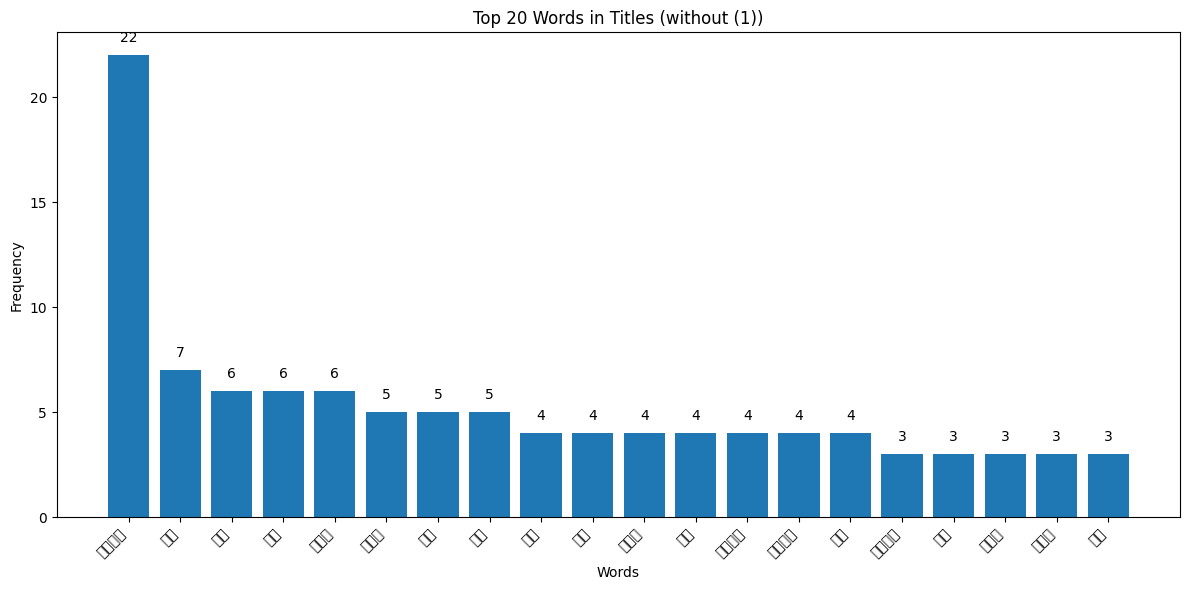

OSError: cannot open resource

In [24]:
#4. 불만 키워드 TOP산출-1 . 맥 버전
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정 (사용자 시스템에 설치된 폰트 경로)
# Windows 예: 'C:/Windows/Fonts/malgun.ttf'
# Mac 예: '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# Linux 예: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
# with open('included_company_filtered_goso_06_11.json', 'r', encoding='utf-8') as json_file:
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 단어 추출 ("(1)" 제거)
all_words = []
for item in data:
    title = item.get('title', '').replace('(1)', '').replace('…', '').replace('및', '').replace('인한', '').strip()
    # title = item.get('title', '').strip()
    words = title.split()
    all_words.extend(words)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

# 단어와 빈도로 분리
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Titles (without (1))')
plt.ylabel('Frequency')
plt.xlabel('Words')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Words (without (1))')
plt.show()


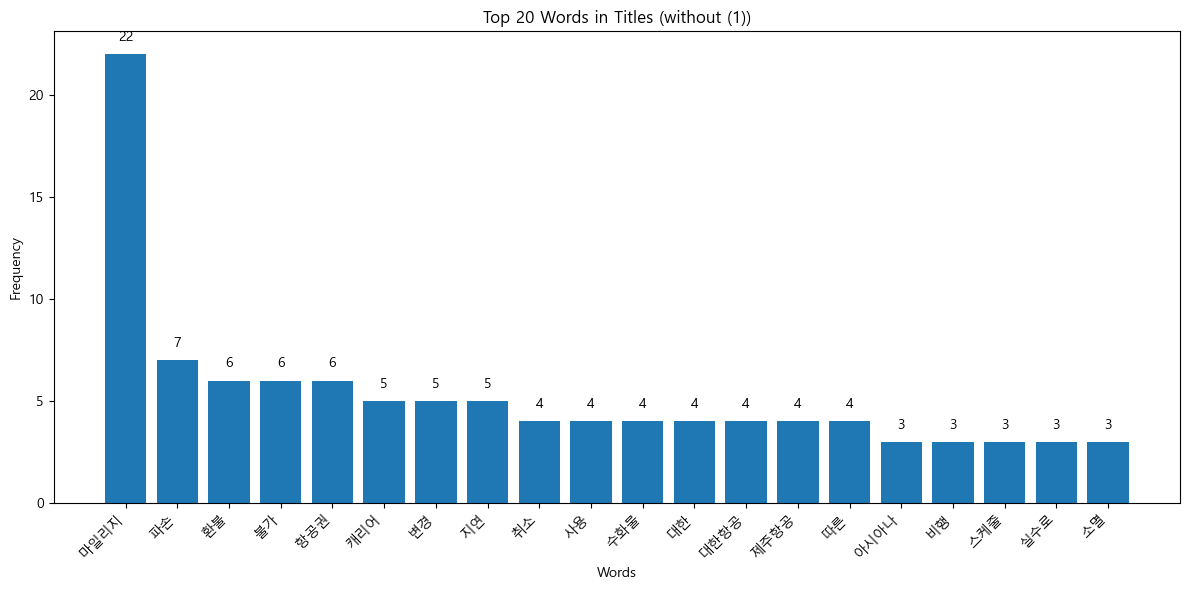

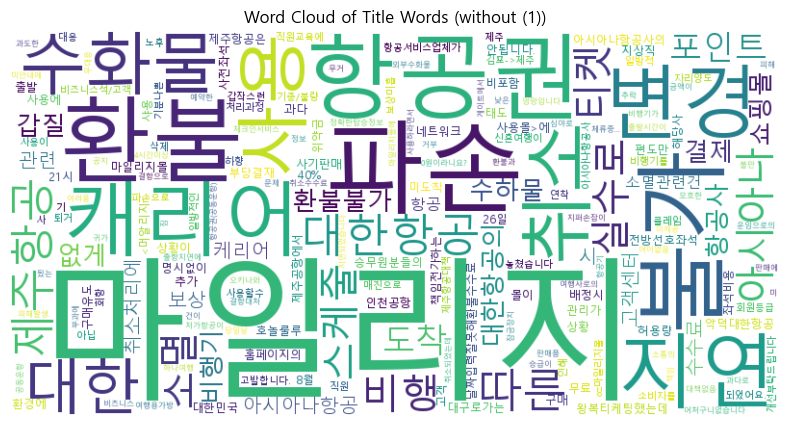

In [ ]:
#4. 불만 키워드 TOP산출-1 . 윈도우 버전
import os
import json
from collections import Counter
import matplotlib.pyplot as plt  
from matplotlib import rc
from wordcloud import WordCloud

# 운영 체제에 따라 한글 폰트 경로 설정
if os.name == 'nt':  # Windows
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    rc('font', family='Malgun Gothic')  # Windows
elif os.name == 'posix':  # macOS or Linux
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
    rc('font', family='AppleGothic')  # macOS or Linux

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 단어 추출 ("(1)" 제거)
all_words = []
for item in data:
    title = item.get('title', '').replace('(1)', '').replace('…', '').replace('및', '').replace('인한', '').strip()
    words = title.split()
    all_words.extend(words)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

# 단어와 빈도로 분리
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Titles (without (1))')
plt.ylabel('Frequency')
plt.xlabel('Words')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Words (without (1))')
plt.show()


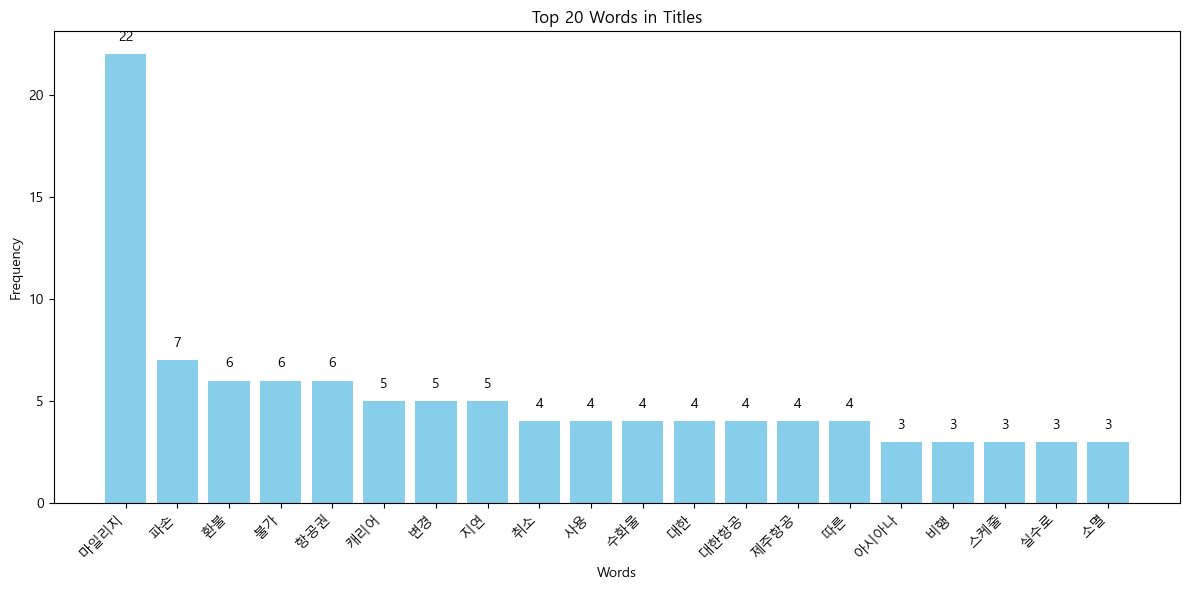

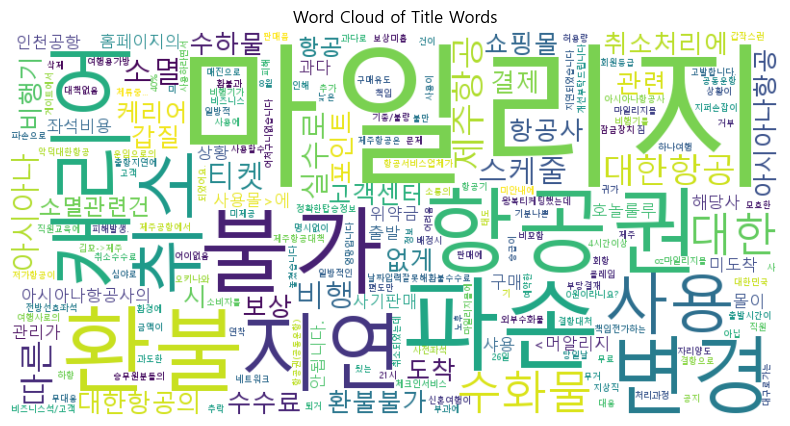


Top 10 Words Dictionary-wise Occurrences:
마일리지: [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
파손: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
환불: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
불가: [0, 0, 0,

In [28]:
#4-3 X./ 탑 20개 /10개 dic단위로 다시 산출 시도
import os
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 운영 체제에 따라 한글 폰트 경로 설정
if os.name == 'nt':  # Windows
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    rc('font', family='Malgun Gothic')  # Windows
elif os.name == 'posix':  # macOS or Linux
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
    rc('font', family='AppleGothic')  # macOS or Linux

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 단어 추출 및 빈도 계산
overall_words = []
dictionary_word_counts = []

for item in data:
    title = item.get('title', '').replace('(1)', '').replace('…', '').replace('및', '').replace('인한', '').strip()
    words = title.split()
    overall_words.extend(words)

    # 각 딕셔너리에서 단어 빈도 계산
    word_count = Counter(words)
    dictionary_word_counts.append(word_count)

# 전체 단어 빈도수 계산
overall_word_counts = Counter(overall_words)

# 상위 20개 단어 추출
top_words = overall_word_counts.most_common(20)
words, counts = zip(*top_words)

# 상위 10개 단어의 딕셔너리별 중복 횟수 계산
word_occurrences = defaultdict(list)
top_10_words = [word for word, _ in top_words[:10]]

for word in top_10_words:
    for idx, word_count in enumerate(dictionary_word_counts):
        word_occurrences[word].append(word_count[word])

# 시각화: 막대 그래프
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Titles')
plt.ylabel('Frequency')
plt.xlabel('Words')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 시각화: 워드클라우드
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(overall_word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Words')
plt.show()

# 상위 10개 단어의 딕셔너리별 중복 횟수 출력
print("\nTop 10 Words Dictionary-wise Occurrences:")
for word, occurrences in word_occurrences.items():
    print(f"{word}: {occurrences}")



In [29]:
#5. 불만 키워드 탑n개 빈도 찾기

import json

# JSON 파일 이름
file_name = '6-11월 4개 항공사.json'

# 확인할 단어 목록
target_words = ['마일리지','환불','파손','지연','변경']

def count_items_with_keyword(data, key, keyword):
    """
    JSON 데이터에서 특정 키의 값에 키워드가 포함된 리스트 항목의 개수를 반환.
    """
    count = 0

    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict) and key in item:
                # 키의 값이 문자열이고 키워드가 포함되면 카운트 증가
                if isinstance(item[key], str) and keyword in item[key]:
                    count += 1
    elif isinstance(data, dict):
        for value in data.values():
            count += count_items_with_keyword(value, key, keyword)

    return count

try:
    # JSON 파일 읽기
    with open(file_name, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # 단어별로 title 키에서 포함된 항목 수 계산
    results = {}
    for word in target_words:
        results[word] = count_items_with_keyword(data, 'title', word)

    # 결과 출력
    print("단어별 'title' 키에 포함된 리스트 항목 개수:")
    for word, count in results.items():
        print(f"'{word}': {count}개")
except FileNotFoundError:
    print(f"파일 '{file_name}'을(를) 찾을 수 없습니다.")
except json.JSONDecodeError:
    print("JSON 파일 형식이 올바르지 않습니다.")

단어별 'title' 키에 포함된 리스트 항목 개수:
'마일리지': 25개
'환불': 11개
'파손': 8개
'지연': 10개
'변경': 6개


In [31]:
##5-2.x.  빈도찾기 다시 시도 
import os
import json
from collections import defaultdict

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 포함시킬 단어 리스트
keywords = ['마일리지', '환불', '파손', '지연', '변경']

# 단어별 'title' 키 포함 항목 개수 및 리스트 초기화
keyword_counts = {key: 0 for key in keywords}
keyword_titles = {key: [] for key in keywords}

# 데이터 탐색 및 키워드 분석
for item in data:
    title = item.get('title', '').strip()
    for keyword in keywords:
        if keyword in title:
            keyword_counts[keyword] += 1
            keyword_titles[keyword].append(title)

# 결과 출력
print("Keyword Counts:")
for keyword, count in keyword_counts.items():
    print(f"{keyword}: {count}")

print("\nKeyword Titles:")
for keyword, titles in keyword_titles.items():
    print(f"\n{keyword}:")
    for title in titles:
        print(f"- {title}")

# 저장을 원한다면 아래 코드 활성화
# with open('keyword_analysis_results.json', 'w', encoding='utf-8') as output_file:
#     json.dump({'counts': keyword_counts, 'titles': keyword_titles}, output_file, ensure_ascii=False, indent=4)


Keyword Counts:
마일리지: 25
환불: 11
파손: 8
지연: 10
변경: 6

Keyword Titles:

마일리지:
- 아시아나 마일리지 샤용(1)
- 마일리지 몰이 관리가 안됩니다. (1)
- 마일리지 사용 불가(1)
- 마일리지 사용에 대한 대한항공의 갑질(1)
- 마일리지몰 사용 불가(1)
- 항공사 마일리지 사용할수 없게 소비자를 기…(1)
- 마일리지 사용 불가(1)
- 아시아나항공사 쇼핑몰 매진으로 마일리지 …(1)
- 마일리지 사용 불가(1)
- 아시아나항공 oz마일리지몰 마일리지 사용이 …(1)
- 마일리지 소멸 관련(1)
- 마일리지 소멸(1)
- 마일리지 사용하라면서 마일리지몰에 판매품…(1)
- 마일리지 소멸관련건(1)
- 마일리지 쇼핑몰 지속 품절 상태(1)
- 마일리지 몰 운영 행태(1)
- 마일리지몰의 사기(1)
- 마일리지 항공권 유류할증료 결제 (1)
- 마일리지 사용불가 (1)
- 가족마일리지 등록 거부의 건(1)
- 마일리지 소멸관련건(1)
- 마일리지 사용할수가 없어요(1)
- 이곳의 마일리지 사용은 불법인것 같아요(1)
- 소멸예정 마일리지 사용부분(1)
- 마일리지 소멸 계산 (1)

환불:
- 구매 포인트 환불(1)
- 날짜입력잘못해환불수수료 40%(1)
- 왕복티케팅했는데 명시없이 편도만 환불불가…(1)
- 티켓 환불과 소통의 문제(1)
- 취소처리에 따른 환불 불가(1)
- 제주항공 티켓 환불 금액이 0원이라니요?(1)
- 취소처리에 따른 환불불가(1)
- 제주항공 병환신청 환불신고 민원(1)
- 항공권 변경 및 환불 (1)
- 와이페이모어 환불 신청(1)
- 결항에 대한 취소 수수료 환불 불가 받았습니…(1)

파손:
- 캐리어 파손(1)
- 캐리어 파손 및 보상미흡(1)
- 수화물 파손으로 인한 제주항공 고발합니다.(1)
- 여행용가방 지퍼손잡이 파손(1)
- 외부수화물 캐리어 잠금장치 파손 보상 거부…(1)
- 케리어 파손 보상(1)
- 수하물 파손(1)
- 캐리어 파손(1)

지연:
- 일방적

In [32]:
#5. 항공사별 탑5민원 포함 Title 모음
import json

# JSON 파일 이름
file_name = '6-11월 4개 항공사.json'

# 확인할 단어 목록
target_words = ['마일리지', '파손', '환불', '지연', '변경']

def extract_titles(data, company_name, key, keywords):
    """
    JSON 데이터에서 특정 company 이름과 title 키의 값에 키워드가 포함된 title만 추출.
    """
    titles = []

    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict):
                # company가 일치하고, title에 특정 단어 포함 여부 확인
                if item.get('company') == company_name and key in item:
                    if any(keyword in item[key] for keyword in keywords):
                        titles.append(item[key])
    elif isinstance(data, dict):
        for value in data.values():
            titles.extend(extract_titles(value, company_name, key, keywords))

    return titles

try:
    # JSON 파일 읽기
    with open(file_name, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # title 값만 추출
    result_titles = extract_titles(data, '아시아나항공', 'title', target_words)

    # 결과 출력
    print("아시아나항공의 'title' 값 중 특정 단어가 포함된 항목:")
    for title in result_titles:
        print(title)

    # 결과를 텍스트 파일로 저장
    with open('아시아나항공_titles.txt', 'w', encoding='utf-8') as output_file:
        output_file.write('\n'.join(result_titles))

    print("\n필터링된 title 값이 '아시아나항공_titls.txt' 파일에 저장되었습니다.")
except FileNotFoundError:
    print(f"파일 '{file_name}'을(를) 찾을 수 없습니다.")
except json.JSONDecodeError:
    print("JSON 파일 형식이 올바르지 않습니다.")

아시아나항공의 'title' 값 중 특정 단어가 포함된 항목:
아시아나 마일리지 샤용(1)
마일리지 몰이 관리가 안됩니다. (1)
마일리지 사용 불가(1)
마일리지몰 사용 불가(1)
항공사 마일리지 사용할수 없게 소비자를 기…(1)
마일리지 사용 불가(1)
아시아나항공사 쇼핑몰 매진으로 마일리지 …(1)
일방적인 자리양도 및 지연
마일리지 사용 불가(1)
아시아나항공 oz마일리지몰 마일리지 사용이 …(1)
마일리지 소멸 관련(1)
마일리지 소멸(1)
티켓 환불과 소통의 문제(1)
마일리지 사용하라면서 마일리지몰에 판매품…(1)
마일리지 소멸관련건(1)
마일리지 쇼핑몰 지속 품절 상태(1)
마일리지 몰 운영 행태(1)
마일리지몰의 사기(1)
항공권 변경 및 환불 (1)
마일리지 항공권 유류할증료 결제 (1)
마일리지 사용불가 (1)
마일리지 소멸관련건(1)
마일리지 사용할수가 없어요(1)
이곳의 마일리지 사용은 불법인것 같아요(1)
소멸예정 마일리지 사용부분(1)

필터링된 title 값이 '아시아나항공_titls.txt' 파일에 저장되었습니다.


In [ ]:
# 8월 한 달간 아시아나 크롤링 시도 1
import os
import json
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

# 뉴스 제목 크롤링 함수
def get_news_titles(query, date):
    base_url = "https://search.naver.com/search.naver"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    }
    params = {
        "where": "news",
        "query": query,
        "sm": "tab_opt",
        "sort": "0",  # 관련도순 정렬
        "pd": "3",  # 기간 설정
        "ds": date,  # 시작 날짜
        "de": date,  # 종료 날짜
        "start": 1,  # 첫 페이지
    }
    titles = []
    page = 1
    while True:
        try:
            print(f"Fetching page {page} for date {date}...")
            params["start"] = (page - 1) * 10 + 1  # 페이지 계산
            response = requests.get(base_url, headers=headers, params=params)
            if response.status_code != 200:
                print(f"HTTP 요청 실패: {response.status_code}")
                break
            # HTML 파싱
            soup = BeautifulSoup(response.text, 'html.parser')
            # 뉴스 제목 추출
            news_items = soup.select(".news_tit")  # 제목 링크에 해당하는 클래스
            if not news_items:
                print("더 이상 뉴스가 없습니다.")
                break
            for item in news_items:
                title = item.get("title")
                if title:
                    titles.append(title)
            # 다음 페이지로 이동
            page += 1
            # 네이버 뉴스 검색은 최대 400개 기사만 제공
            if page > 40:
                print("최대 페이지 제한 도달.")
                break
        except Exception as e:
            print(f"페이지 {page} 크롤링 중 에러 발생: {e}")
            break
    return titles

# 날짜별 뉴스 저장 함수
def save_daily_news(query, start_date, end_date):
    current_date = datetime.strptime(start_date, "%Y.%m.%d")
    end_date = datetime.strptime(end_date, "%Y.%m.%d")
    all_titles = []
    while current_date <= end_date:
        date_str = current_date.strftime("%Y.%m.%d")
        titles = get_news_titles(query, date_str)
        # 날짜별 데이터 추가
        all_titles.extend(titles)
        current_date += timedelta(days=1)
    return all_titles

# JSON 파일로 저장
def save_to_json(data, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

# 키워드 분석 함수
def analyze_keywords(data, keywords):
    keyword_counts = {key: 0 for key in keywords}
    keyword_titles = {key: [] for key in keywords}

    for title in data:
        for keyword in keywords:
            if keyword in title:
                keyword_counts[keyword] += 1
                keyword_titles[keyword].append(title)

    return keyword_counts, keyword_titles

# 메인 실행 코드
if __name__ == "__main__":
    # 크롤링 설정
    query = "아시아나항공"
    start_date = "2024.08.01"
    end_date = "2024.08.01"

    # 데이터 크롤링
    print("뉴스 크롤링 중...")
    news_titles = save_daily_news(query, start_date, end_date)

    # 크롤링 결과 저장
    save_to_json(news_titles, 'august_2024_asiana_news.json')
    print("크롤링 결과 저장 완료.")

    # 키워드 분석
    keywords = ['마일리지', '환불', '파손', '지연', '변경']
    keyword_counts, keyword_titles = analyze_keywords(news_titles, keywords)

    # 분석 결과 출력
    print("\nKeyword Counts:")
    for keyword, count in keyword_counts.items():
        print(f"{keyword}: {count}")

    print("\nKeyword Titles:")
    for keyword, titles in keyword_titles.items():
        print(f"\n{keyword}:")
        for title in titles:
            print(f"- {title}")

    # 분석 결과 저장
    save_to_json({"counts": keyword_counts, "titles": keyword_titles}, 'keyword_analysis_results.json')
    print("분석 결과 저장 완료.")


뉴스 크롤링 중...
Fetching page 1 for date 2024.08.01...
Fetching page 2 for date 2024.08.01...
Fetching page 3 for date 2024.08.01...
Fetching page 4 for date 2024.08.01...
더 이상 뉴스가 없습니다.
크롤링 결과 저장 완료.

Keyword Counts:
마일리지: 0
환불: 0
파손: 0
지연: 0
변경: 0

Keyword Titles:

마일리지:

환불:

파손:

지연:

변경:
분석 결과 저장 완료.


In [38]:
#아시아나 기사 크롤링 코드 시도
import os
import json
from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup

# 뉴스 제목 크롤링 함수
def get_news_titles(query, date):
    base_url = "https://search.naver.com/search.naver"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    }
    params = {
        "where": "news",
        "query": query,
        "sm": "tab_opt",
        "sort": "0",  # 관련도순 정렬
        "pd": "3",  # 기간 설정
        "ds": date,  # 시작 날짜
        "de": date,  # 종료 날짜
        "start": 1,  # 첫 페이지
    }
    titles = []
    page = 1
    while True:
        try:
            print(f"Fetching page {page} for date {date}...")
            params["start"] = (page - 1) * 10 + 1  # 페이지 계산
            response = requests.get(base_url, headers=headers, params=params)
            if response.status_code != 200:
                print(f"HTTP 요청 실패: {response.status_code}")
                break
            # HTML 파싱
            soup = BeautifulSoup(response.text, 'html.parser')
            # 뉴스 제목 추출
            news_items = soup.select(".news_tit")  # 제목 링크에 해당하는 클래스
            if not news_items:
                print("더 이상 뉴스가 없습니다.")
                break
            for item in news_items:
                title = item.get("title")
                if title:
                    titles.append(title)
            # 다음 페이지로 이동
            page += 1
            # 네이버 뉴스 검색은 최대 400개 기사만 제공
            if page > 40:
                print("최대 페이지 제한 도달.")
                break
        except Exception as e:
            print(f"페이지 {page} 크롤링 중 에러 발생: {e}")
            break
    return titles

# 폴더 생성 함수
def create_folder(folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

# 날짜별 뉴스 저장 함수
def save_daily_news(query, start_date, end_date, folder_name):
    current_date = datetime.strptime(start_date, "%Y.%m.%d")
    end_date = datetime.strptime(end_date, "%Y.%m.%d")
    create_folder(folder_name)
    
    while current_date <= end_date:
        date_str = current_date.strftime("%Y.%m.%d")
        titles = get_news_titles(query, date_str)
        # 날짜별 JSON 파일 저장
        file_path = os.path.join(folder_name, f"news_titles_{date_str}.json")
        with open(file_path, "w", encoding="utf-8") as file:
            json.dump(titles, file, ensure_ascii=False, indent=4)
        print(f"{len(titles)}개의 뉴스 제목이 '{file_path}' 파일에 저장되었습니다.")
        current_date += timedelta(days=1)

# 실행 코드
if __name__ == "__main__":
    query = "아시아나항공"
    start_date = "2024.08.01"
    end_date = "2024.08.31"
    folder_name = "기업기사 크롤링1"

    print("뉴스 크롤링 시작...")
    save_daily_news(query, start_date, end_date, folder_name)
    print("뉴스 크롤링 완료.")


뉴스 크롤링 시작...
Fetching page 1 for date 2024.08.01...
Fetching page 2 for date 2024.08.01...
Fetching page 3 for date 2024.08.01...
Fetching page 4 for date 2024.08.01...
더 이상 뉴스가 없습니다.
30개의 뉴스 제목이 '기업기사 크롤링1\news_titles_2024.08.01.json' 파일에 저장되었습니다.
Fetching page 1 for date 2024.08.02...
Fetching page 2 for date 2024.08.02...
Fetching page 3 for date 2024.08.02...
Fetching page 4 for date 2024.08.02...
Fetching page 5 for date 2024.08.02...
Fetching page 6 for date 2024.08.02...
HTTP 요청 실패: 403
50개의 뉴스 제목이 '기업기사 크롤링1\news_titles_2024.08.02.json' 파일에 저장되었습니다.
Fetching page 1 for date 2024.08.03...
HTTP 요청 실패: 403
0개의 뉴스 제목이 '기업기사 크롤링1\news_titles_2024.08.03.json' 파일에 저장되었습니다.
Fetching page 1 for date 2024.08.04...
HTTP 요청 실패: 403
0개의 뉴스 제목이 '기업기사 크롤링1\news_titles_2024.08.04.json' 파일에 저장되었습니다.
Fetching page 1 for date 2024.08.05...
HTTP 요청 실패: 403
0개의 뉴스 제목이 '기업기사 크롤링1\news_titles_2024.08.05.json' 파일에 저장되었습니다.
Fetching page 1 for date 2024.08.06...
HTTP 요청 실패: 403
0개의 뉴스 제목이 '기업기사 크롤링1\ne

In [1]:
#기사 크롤링- 제주항공
import requests
from bs4 import BeautifulSoup
import json
import time
# URL 설정
base_url = "https://search.naver.com/search.naver"
query = {
    "where": "news",
    "query": "제주항공",
    "sm": "tab_opt",
    "sort": "0",
    "photo": "0",
    "field": "0",
    "pd": "3",
    "ds": "2024.06.01",
    "de": "2024.06.30",
    "docid": "",
    "related": "0",
    "mynews": "0",
    "office_type": "0",
    "office_section_code": "0",
    "news_office_checked": "",
    "nso": "so:r,p:from20240601to20241031",
    "is_sug_officeid": "0",
    "office_category": "0",
    "service_area": "0"
}
# 결과를 저장할 리스트
news_titles = []
# 페이지 반복
for page in range(1, 301):  # 최대 100페이지로 제한
    print(f"Processing page {page}")
    query["start"] = (page - 1) * 10 + 1  # 각 페이지의 시작 번호
    # 요청 보내기
    response = requests.get(base_url, params=query)
    if response.status_code != 200:
        print(f"Failed to fetch page {page}")
        break
    # BeautifulSoup으로 파싱
    soup = BeautifulSoup(response.text, "html.parser")
    # 뉴스 제목 추출
    titles = soup.select(".news_tit")
    for title in titles:
        news_titles.append(title["title"])
    # 페이지 딜레이 (반복적 요청 방지)
    time.sleep(1)
# JSON 파일로 저장
output_file = "jeju_06.json"
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(news_titles, f, ensure_ascii=False, indent=4)
print(f"Saved {len(news_titles)} news titles to {output_file}")

Processing page 1
Processing page 2
Processing page 3
Processing page 4
Processing page 5
Processing page 6
Processing page 7
Processing page 8
Processing page 9
Processing page 10
Processing page 11
Processing page 12
Processing page 13
Processing page 14
Processing page 15
Processing page 16
Processing page 17
Processing page 18
Processing page 19
Processing page 20
Processing page 21
Processing page 22
Processing page 23
Processing page 24
Processing page 25
Processing page 26
Processing page 27
Processing page 28
Processing page 29
Processing page 30
Processing page 31
Processing page 32
Processing page 33
Processing page 34
Processing page 35
Processing page 36
Processing page 37
Processing page 38
Processing page 39
Processing page 40
Processing page 41
Processing page 42
Processing page 43
Processing page 44
Processing page 45
Processing page 46
Processing page 47
Processing page 48
Processing page 49
Processing page 50
Processing page 51
Processing page 52
Processing page 53
Pr

In [6]:
import os
import datetime
import requests
from bs4 import BeautifulSoup
import json
import time

def fetch_articles(keyword, start_date, end_date, page_limit=100):
    base_url = "https://search.naver.com/search.naver"
    query = {
        "where": "news",
        "query": keyword,
        "sm": "tab_opt",
        "sort": "0",  # Sort by relevance
        "photo": "0",
        "field": "0",
        "pd": "3",
        "ds": start_date,
        "de": end_date,
        "docid": "",
        "related": "0",
        "mynews": "0",
        "office_type": "0",
        "office_section_code": "0",
        "news_office_checked": "",
        "nso": f"so:r,p:from{start_date.replace('.', '')}to{end_date.replace('.', '')}",
        "is_sug_officeid": "0",
        "office_category": "0",
        "service_area": "0"
    }

    news_titles = []

    for page in range(1, page_limit + 1):
        print(f"Processing page {page} for {start_date} to {end_date}")
        query["start"] = (page - 1) * 10 + 1
        response = requests.get(base_url, params=query)

        if response.status_code != 200:
            print(f"Failed to fetch page {page}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        titles = soup.select(".news_tit")

        for title in titles:
            news_titles.append(title.get_text())

        time.sleep(1)  # Avoid rapid requests

    return news_titles

def save_articles_to_json(articles, file_path):
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(articles, file, ensure_ascii=False, indent=4)

def main():
    keyword = "제주항공"
    output_dir = os.path.join("뉴스크롤링_제주항공", "jeju_air_articles")
    os.makedirs(output_dir, exist_ok=True)

    year = 2024
    for month in range(7, 12):  # From July to November
        start_date = f"{year}.{month:02d}.01"
        if month == 11:
            end_date = f"{year}.{month:02d}.30"
        else:
            end_date = f"{year}.{month:02d}.31"

        articles = fetch_articles(keyword, start_date, end_date)
        file_path = os.path.join(output_dir, f"jeju_{year}_{month:02d}.json")
        save_articles_to_json(articles, file_path)

if __name__ == "__main__":
    main()


Processing page 1 for 2024.07.01 to 2024.07.31
Processing page 2 for 2024.07.01 to 2024.07.31
Processing page 3 for 2024.07.01 to 2024.07.31
Processing page 4 for 2024.07.01 to 2024.07.31
Processing page 5 for 2024.07.01 to 2024.07.31
Processing page 6 for 2024.07.01 to 2024.07.31
Processing page 7 for 2024.07.01 to 2024.07.31
Processing page 8 for 2024.07.01 to 2024.07.31
Processing page 9 for 2024.07.01 to 2024.07.31
Processing page 10 for 2024.07.01 to 2024.07.31
Processing page 11 for 2024.07.01 to 2024.07.31
Processing page 12 for 2024.07.01 to 2024.07.31
Processing page 13 for 2024.07.01 to 2024.07.31
Processing page 14 for 2024.07.01 to 2024.07.31
Processing page 15 for 2024.07.01 to 2024.07.31
Processing page 16 for 2024.07.01 to 2024.07.31
Processing page 17 for 2024.07.01 to 2024.07.31
Processing page 18 for 2024.07.01 to 2024.07.31
Processing page 19 for 2024.07.01 to 2024.07.31
Processing page 20 for 2024.07.01 to 2024.07.31
Processing page 21 for 2024.07.01 to 2024.07.31
P

In [7]:
import os
import datetime
import requests
from bs4 import BeautifulSoup
import json
import time

def fetch_articles(keyword, start_date, end_date, page_limit=100):
    base_url = "https://search.naver.com/search.naver"
    query = {
        "where": "news",
        "query": keyword,
        "sm": "tab_opt",
        "sort": "0",  # Sort by relevance
        "photo": "0",
        "field": "0",
        "pd": "3",
        "ds": start_date,
        "de": end_date,
        "docid": "",
        "related": "0",
        "mynews": "0",
        "office_type": "0",
        "office_section_code": "0",
        "news_office_checked": "",
        "nso": f"so:r,p:from{start_date.replace('.', '')}to{end_date.replace('.', '')}",
        "is_sug_officeid": "0",
        "office_category": "0",
        "service_area": "0"
    }

    news_titles = []

    for page in range(1, page_limit + 1):
        print(f"Processing page {page} for {start_date} to {end_date}")
        query["start"] = (page - 1) * 10 + 1
        response = requests.get(base_url, params=query)

        if response.status_code != 200:
            print(f"Failed to fetch page {page}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        titles = soup.select(".news_tit")

        for title in titles:
            news_titles.append(title.get_text())

        time.sleep(1)  # Avoid rapid requests

    return news_titles

def save_articles_to_json(articles, file_path):
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(articles, file, ensure_ascii=False, indent=4)

def main():
    keyword = "제주항공"
    output_dir = os.path.join("뉴스크롤링_제주항공", "jeju_air_articles")
    os.makedirs(output_dir, exist_ok=True)

    year = 2024
    for month in range(9, 12):  # From July to November
        start_date = f"{year}.{month:02d}.01"
        if month == 11:
            end_date = f"{year}.{month:02d}.30"
        else:
            end_date = f"{year}.{month:02d}.31"

        articles = fetch_articles(keyword, start_date, end_date)
        file_path = os.path.join(output_dir, f"jeju_{year}_{month:02d}.json")
        save_articles_to_json(articles, file_path)

if __name__ == "__main__":
    main()


Processing page 1 for 2024.09.01 to 2024.09.31
Processing page 2 for 2024.09.01 to 2024.09.31
Processing page 3 for 2024.09.01 to 2024.09.31
Processing page 4 for 2024.09.01 to 2024.09.31
Processing page 5 for 2024.09.01 to 2024.09.31
Processing page 6 for 2024.09.01 to 2024.09.31
Processing page 7 for 2024.09.01 to 2024.09.31
Processing page 8 for 2024.09.01 to 2024.09.31
Processing page 9 for 2024.09.01 to 2024.09.31
Processing page 10 for 2024.09.01 to 2024.09.31
Processing page 11 for 2024.09.01 to 2024.09.31
Processing page 12 for 2024.09.01 to 2024.09.31
Processing page 13 for 2024.09.01 to 2024.09.31
Processing page 14 for 2024.09.01 to 2024.09.31
Processing page 15 for 2024.09.01 to 2024.09.31
Processing page 16 for 2024.09.01 to 2024.09.31
Processing page 17 for 2024.09.01 to 2024.09.31
Processing page 18 for 2024.09.01 to 2024.09.31
Processing page 19 for 2024.09.01 to 2024.09.31
Processing page 20 for 2024.09.01 to 2024.09.31
Processing page 21 for 2024.09.01 to 2024.09.31
P

In [8]:
import os
import datetime
import requests
from bs4 import BeautifulSoup
import json
import time

def fetch_articles(keyword, start_date, end_date, page_limit=100):
    base_url = "https://search.naver.com/search.naver"
    query = {
        "where": "news",
        "query": keyword,
        "sm": "tab_opt",
        "sort": "0",  # Sort by relevance
        "photo": "0",
        "field": "0",
        "pd": "3",
        "ds": start_date,
        "de": end_date,
        "docid": "",
        "related": "0",
        "mynews": "0",
        "office_type": "0",
        "office_section_code": "0",
        "news_office_checked": "",
        "nso": f"so:r,p:from{start_date.replace('.', '')}to{end_date.replace('.', '')}",
        "is_sug_officeid": "0",
        "office_category": "0",
        "service_area": "0"
    }

    news_titles = []

    for page in range(1, page_limit + 1):
        print(f"Processing page {page} for {start_date} to {end_date}")
        query["start"] = (page - 1) * 10 + 1
        response = requests.get(base_url, params=query)

        if response.status_code != 200:
            print(f"Failed to fetch page {page}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        titles = soup.select(".news_tit")

        for title in titles:
            news_titles.append(title.get_text())

        time.sleep(1)  # Avoid rapid requests

    return news_titles

def save_articles_to_json(articles, file_path):
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(articles, file, ensure_ascii=False, indent=4)

def main():
    keyword = "진에어"
    output_dir = os.path.join("뉴스크롤링_진에어", "jin_air_articles")
    os.makedirs(output_dir, exist_ok=True)

    year = 2024
    for month in range(6, 12):  # From June to November
        start_date = f"{year}.{month:02d}.01"
        if month == 11:
            end_date = f"{year}.{month:02d}.30"
        else:
            end_date = f"{year}.{month:02d}.31"

        articles = fetch_articles(keyword, start_date, end_date)
        file_path = os.path.join(output_dir, f"jin_{year}_{month:02d}.json")
        save_articles_to_json(articles, file_path)

if __name__ == "__main__":
    main()


Processing page 1 for 2024.06.01 to 2024.06.31
Processing page 2 for 2024.06.01 to 2024.06.31
Processing page 3 for 2024.06.01 to 2024.06.31
Processing page 4 for 2024.06.01 to 2024.06.31
Processing page 5 for 2024.06.01 to 2024.06.31
Processing page 6 for 2024.06.01 to 2024.06.31
Processing page 7 for 2024.06.01 to 2024.06.31
Processing page 8 for 2024.06.01 to 2024.06.31
Processing page 9 for 2024.06.01 to 2024.06.31
Processing page 10 for 2024.06.01 to 2024.06.31
Processing page 11 for 2024.06.01 to 2024.06.31
Processing page 12 for 2024.06.01 to 2024.06.31
Processing page 13 for 2024.06.01 to 2024.06.31
Processing page 14 for 2024.06.01 to 2024.06.31
Processing page 15 for 2024.06.01 to 2024.06.31
Processing page 16 for 2024.06.01 to 2024.06.31
Processing page 17 for 2024.06.01 to 2024.06.31
Processing page 18 for 2024.06.01 to 2024.06.31
Processing page 19 for 2024.06.01 to 2024.06.31
Processing page 20 for 2024.06.01 to 2024.06.31
Processing page 21 for 2024.06.01 to 2024.06.31
P

In [ ]:
 bb

In [1]:
import os 

os.getcwd()

'c:\\sesac\\미니프로젝트1'